In [1]:
# IMPORTAÇÃO DAS BIBLIOTECAS
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
# COLETA DE DADOS

In [3]:
# Definindo a pasta de trabalho
dir_name = 'D:\\TCC\\DATASETS\\'

In [4]:
# Criando lista com nomes de arquivos txt 
def ler_diretorio():
    lista_txt = []
    for txt in os.listdir(dir_name):
        if txt.endswith('.txt'):
            lista_txt.append(txt)
    return lista_txt
lista_txt = ler_diretorio()
print('Os datasets utilizados no projeto são: \n     {}\n'. format(lista_txt))
print('O total de datasets utilizados é: {}'.format(len(lista_txt)))
print('O tipo da variável lista_txt é: {}'.format(type(lista_txt)))
print('O tipo dos elementos da lista_txt é: {}\n'.format(type(lista_txt[0])))

Os datasets utilizados no projeto são: 
     ['bbchealth.txt', 'cbchealth.txt', 'cnnhealth.txt', 'everydayhealth.txt', 'foxnewshealth.txt', 'gdnhealthcare.txt', 'goodhealth.txt', 'KaiserHealthNews.txt', 'latimeshealth.txt', 'msnhealthnews.txt', 'NBChealth.txt', 'nprhealth.txt', 'nytimeshealth.txt', 'reuters_health.txt', 'usnewshealth.txt', 'wsjhealth.txt']

O total de datasets utilizados é: 16
O tipo da variável lista_txt é: <class 'list'>
O tipo dos elementos da lista_txt é: <class 'str'>



In [5]:
# Lendo os arquivos txt - enconding 'utf-8' e 'cp1252' (para correção do erro 'UnicodeDecodeError')
mensagens = []
msg_1252 = []
for txt in lista_txt:
    try:
        with open(dir_name+txt,'r', encoding='utf-8') as f1:
            for linha in f1.readlines():
                col = linha.split('|')
                mensagens.append(col)
            
    except:
        msg_1252.append(txt)
    
for txt in msg_1252:
    with open(dir_name+txt,'r', encoding='cp1252') as f2:
        for linha in f2.readlines():
            atributo = linha.split('|')
            mensagens.append(atributo)
print('O total de mensagens lidas é: {}\n'.format(len(mensagens)))
print('Os datasets com erro na leitura com utf-8 são:\n{}\n'.format(msg_1252))

print(type(mensagens))
print(type(mensagens[0])) #mensagem é uma lista de listas
print(mensagens[1]) #o link http da mensagem leva para página da agência de notícias na data atual
print(mensagens[-1])
print(type(mensagens[0][1]))

O total de mensagens lidas é: 63327

Os datasets com erro na leitura com utf-8 são:
['foxnewshealth.txt', 'KaiserHealthNews.txt', 'msnhealthnews.txt', 'NBChealth.txt', 'wsjhealth.txt']

<class 'list'>
<class 'list'>
['585947808772960257', 'Wed Apr 08 23:30:18 +0000 2015', 'GP workload harming care - BMA poll http://bbc.in/1ChTBRv\n']
['415361763362603008', 'Tue Dec 24 06:02:16 +0000 2013', 'For Desperate Family in India, a Ray of Hope From Alabama http://on.wsj.com/1kBFgsB\n']
<class 'str'>


In [6]:
# Verificando tamanho máximo de cada mensagem para conferir se mensagens foram lidas corretamente
col = 3
for mensagem in mensagens:
    tam = len(mensagem)
    if tam > col:
        col = tam
print(col)          

5


In [7]:
# Convertendo a variável mensagens em um dataframe
data = pd.DataFrame(mensagens)
data.info()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63327 entries, 0 to 63326
Data columns (total 5 columns):
0    63327 non-null object
1    63326 non-null object
2    63326 non-null object
3    214 non-null object
4    2 non-null object
dtypes: object(5)
memory usage: 2.4+ MB


,0,1,2,3,4
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,None,None
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,None,None
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,None,None


In [8]:
data = pd.DataFrame(mensagens, columns=['Id','Dia_Hora', 'Mensagem','X','Y'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63327 entries, 0 to 63326
Data columns (total 5 columns):
Id          63327 non-null object
Dia_Hora    63326 non-null object
Mensagem    63326 non-null object
X           214 non-null object
Y           2 non-null object
dtypes: object(5)
memory usage: 2.4+ MB


In [9]:
data[data['X'].notnull() == True]

,Id,Dia_Hora,Mensagem,X,Y
4774,529748838836625409,Tue Nov 04 21:35:40 +0000 2014,RT @susanamas: 1/ NEW,Immigration Minister Chris Alexander says Ott...,None
4832,526812372280029186,Mon Oct 27 19:07:11 +0000 2014,Updated,Ebola quarantines in U.S.: Are they warranted...,None
4842,526030674348998656,Sat Oct 25 15:21:00 +0000 2014,Analysis,Ebola quarantines in U.S.: are they warranted...,None
5192,512394826009305088,Thu Sep 18 00:17:01 +0000 2014,Analysis,"Why the U.S. is taking the lead on Ebola: ""We...",None
5197,512273167885553664,Wed Sep 17 16:13:35 +0000 2014,Analysis,Ebola outbreak: Why the U.S. is taking the le...,None
5221,511447388938969089,Mon Sep 15 09:32:14 +0000 2014,Downsizing,"Losing weight is hard, but it’s my only optio...",None
5276,507888692703551488,Fri Sep 05 13:51:15 +0000 2014,IN PHOTOS,Highlights from the first day of TIFF 2014 ht...,None
5358,504410996006748161,Tue Aug 26 23:32:07 +0000 2014,UPDATED,3rd U.S. hostage held by ISIS is a 26-year-ol...,None
5414,501864962059681792,Tue Aug 19 22:55:05 +0000 2014,ANALYSIS,Africans understandably wary about promised E...,None
5638,486604101107462144,Tue Jul 08 20:13:53 +0000 2014,Canada’s nursing workforce continues to grow,CIHI http://bit.ly/U1SIwI\n,None


In [10]:
mensagens[4774]

['529748838836625409',
 'Tue Nov 04 21:35:40 +0000 2014',
 'RT @susanamas: 1/ NEW ',
 ' Immigration Minister Chris Alexander says Ottawa will offer health care under the IFHP to pregnant woman, children.…\n']

In [11]:
data[data['Y'].notnull() == True]

,Id,Dia_Hora,Mensagem,X,Y
9520,397344404072960001,Mon Nov 04 12:47:42 +0000 2013,"RT @cmaries08: Thanks, @cnnhealth",finally a solid explanation,"Good!: ""The ACA penalizes hospitals that see ..."
25004,135741628781568000,Sun Nov 13 15:31:40 +0000 2011,RT @CharityIdeas: 100 Best Companies to Work f...,Fortune,http://cnnmon.ie/w0gDqv #jobsearch #hiring\n


In [12]:
mensagens[9520]

['397344404072960001',
 'Mon Nov 04 12:47:42 +0000 2013',
 'RT @cmaries08: Thanks, @cnnhealth ',
 ' finally a solid explanation ',
 ' Good!: "The ACA penalizes hospitals that see patients return" http://t.co…\n']

In [13]:
data['X'].fillna('', inplace=True)
data['Y'].fillna('', inplace=True)
data['Mensagem_Concatenada'] = (data['Mensagem'] + data['X'] + data['Y'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63327 entries, 0 to 63326
Data columns (total 6 columns):
Id                      63327 non-null object
Dia_Hora                63326 non-null object
Mensagem                63326 non-null object
X                       63327 non-null object
Y                       63327 non-null object
Mensagem_Concatenada    63326 non-null object
dtypes: object(6)
memory usage: 2.9+ MB


In [14]:
data[data['Mensagem'].notnull() == False]

,Id,Dia_Hora,Mensagem,X,Y,Mensagem_Concatenada
25831,\n,None,None,,,NaN


In [15]:
df = data[data['Mensagem'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63326 entries, 0 to 63326
Data columns (total 6 columns):
Id                      63326 non-null object
Dia_Hora                63326 non-null object
Mensagem                63326 non-null object
X                       63326 non-null object
Y                       63326 non-null object
Mensagem_Concatenada    63326 non-null object
dtypes: object(6)
memory usage: 3.4+ MB


In [16]:
df.duplicated().value_counts()

False    63326
dtype: int64

In [17]:
df.head(3)

,Id,Dia_Hora,Mensagem,X,Y,Mensagem_Concatenada
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,,,Breast cancer risk test devised http://bbc.in/...
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,,,GP workload harming care - BMA poll http://bbc...
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,,,Short people's 'heart risk greater' http://bbc...


In [ ]:
# TRATAMENTO DOS DADOS

In [18]:
# https://stackoverflow.com/questions/45037907/python-astypestr-gives-settingwithcopywarning-and-requests-i-use-loc

# Atribuindo cópia a df para evitar mensagem "SettingWithCopyWarning"
df = df.copy()
# Criando novas colunas
df.loc[:,'Data']=df.Dia_Hora.astype('datetime64[D]')
df.loc[:,'Dia_Semana'] = df.Dia_Hora.apply(lambda x: (x.split()[0]))
df.loc[:,'Ano'] = df.Data.dt.year
df.loc[:,'Mensagem_Final'] = df.Mensagem_Concatenada.apply(lambda x: ' '.join(list([w for w in x.split(' ') if w[0:4]!='http'])))
df.loc[:,'http']= df.Mensagem_Concatenada.apply(lambda x: ' '.join(list([w for w in x.split(' ') if w[0:4]=='http'])))
df.loc[:,'Tamanho_Mensagem'] = df.Mensagem_Final.apply(lambda x: len(x))
df.loc[:,'Tamanho_http'] = df.http.apply(lambda x: len(x))
df.loc[:,'Video'] =df.Mensagem_Final.apply(lambda x: x[0:6]=='VIDEO:')

# Excluindo colunas desnecessárias
df.drop(columns=['Id', 'Dia_Hora', 'Mensagem', 'X', 'Y', 'Mensagem_Concatenada'], inplace=True)

df.head(3)

,Data,Dia_Semana,Ano,Mensagem_Final,http,Tamanho_Mensagem,Tamanho_http,Video
0,2015-04-09,Thu,2015,Breast cancer risk test devised,http://bbc.in/1CimpJF\n,31,22,False
1,2015-04-08,Wed,2015,GP workload harming care - BMA poll,http://bbc.in/1ChTBRv\n,35,22,False
2,2015-04-08,Wed,2015,Short people's 'heart risk greater',http://bbc.in/1ChTANp\n,35,22,False


In [19]:
# Contruindo df apenas com mensagens de video

df_video = df[df['Video']==True]
df_video.info()
df_video.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 6 to 50003
Data columns (total 8 columns):
Data                816 non-null datetime64[ns]
Dia_Semana          816 non-null object
Ano                 816 non-null int64
Mensagem_Final      816 non-null object
http                816 non-null object
Tamanho_Mensagem    816 non-null int64
Tamanho_http        816 non-null int64
Video               816 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(3), object(3)
memory usage: 51.8+ KB


,Data,Dia_Semana,Ano,Mensagem_Final,http,Tamanho_Mensagem,Tamanho_http,Video
6,2015-04-08,Wed,2015,"VIDEO: 'All day is empty, what am I going to do?'",http://bbc.in/1N7wSSz\n,49,22,True
7,2015-04-08,Wed,2015,VIDEO: 'Overhaul needed' for end-of-life care,http://bbc.in/1CmrRu3\n,45,22,True
9,2015-04-07,Tue,2015,VIDEO: NHS: Labour and Tory key policies,http://bbc.in/1Ci5eqD\n,40,22,True


In [20]:
# Construindo df apenas com hashtags

hash = df['Mensagem_Final'].tolist() # converte series em lista de strings
hashtags_list=[]
for msg in hash:
    for w in msg.split():
        if w[0]=='#':
            hashtags_list.append(w)
            ' '.join(hashtags_list)

hashtags = ','.join(hashtags_list) 

df_hash = pd.DataFrame(hashtags_list, columns=['hash'])
df_hash.head()

#print(type(hash)) # lista de mensagens
#print(type(hashtags_list)) # lista de hashtags
#print(type(hashtags)) # string de hashtags
#print(hashtags)
#print(hashtags_list)

,hash
0,#naturalhealth
1,#essentialoils
2,#HealthCanada
3,#drugsafety
4,#Physicians:


In [21]:
df.head(10)

,Data,Dia_Semana,Ano,Mensagem_Final,http,Tamanho_Mensagem,Tamanho_http,Video
0,2015-04-09,Thu,2015,Breast cancer risk test devised,http://bbc.in/1CimpJF\n,31,22,False
1,2015-04-08,Wed,2015,GP workload harming care - BMA poll,http://bbc.in/1ChTBRv\n,35,22,False
2,2015-04-08,Wed,2015,Short people's 'heart risk greater',http://bbc.in/1ChTANp\n,35,22,False
3,2015-04-08,Wed,2015,New approach against HIV 'promising',http://bbc.in/1E6jAjt\n,36,22,False
4,2015-04-08,Wed,2015,Coalition 'undermined NHS' - doctors,http://bbc.in/1CnLwK7\n,36,22,False
5,2015-04-08,Wed,2015,Review of case against NHS manager,http://bbc.in/1Ffj6ci\n,34,22,False
6,2015-04-08,Wed,2015,"VIDEO: 'All day is empty, what am I going to do?'",http://bbc.in/1N7wSSz\n,49,22,True
7,2015-04-08,Wed,2015,VIDEO: 'Overhaul needed' for end-of-life care,http://bbc.in/1CmrRu3\n,45,22,True
8,2015-04-08,Wed,2015,Care for dying 'needs overhaul',http://bbc.in/1FdSGrl\n,31,22,False
9,2015-04-07,Tue,2015,VIDEO: NHS: Labour and Tory key policies,http://bbc.in/1Ci5eqD\n,40,22,True


In [ ]:
#EXPLORAÇÃO DOS DADOS

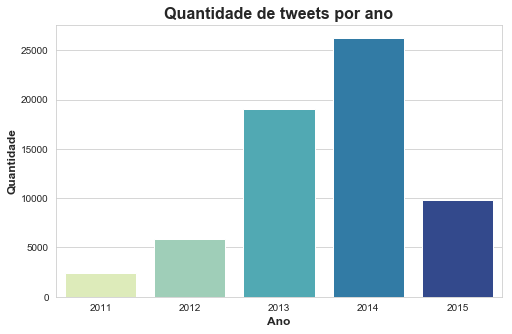

In [22]:
#Countplot do df total
fig, ax = plt.subplots(figsize=(8,5)) 
sns.countplot(df['Ano'], palette='YlGnBu')
plt.title('Quantidade de tweets por ano', fontsize=16, fontweight='bold')
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()

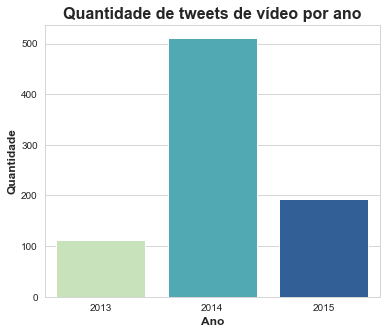

In [23]:
#Countplot do df video
fig, ax = plt.subplots(figsize=(6,5)) 
sns.countplot(df_video['Ano'], palette='YlGnBu')
plt.title('Quantidade de tweets de vídeo por ano', fontsize=16, fontweight='bold')
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()

In [24]:
df['Ano'].value_counts()

2014    26250
2013    18998
2015     9822
2012     5889
2011     2367
Name: Ano, dtype: int64

In [25]:
df_video['Ano'].value_counts()

2014    511
2015    193
2013    112
Name: Ano, dtype: int64

C:\Users\Derlon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


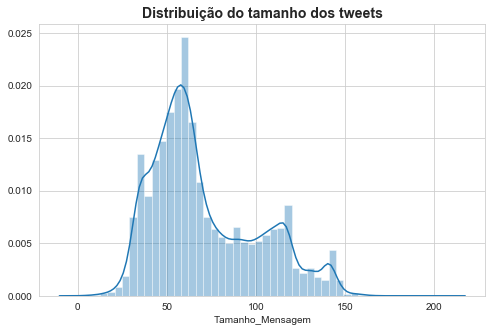

In [26]:
#Distplot do df total
fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(df['Tamanho_Mensagem'])
plt.title('Distribuição do tamanho dos tweets', fontsize=14, fontweight='bold')
plt.show()

#https://stackoverflow.com/questions/53334421/futurewarning-with-distplot-in-seaborn

C:\Users\Derlon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


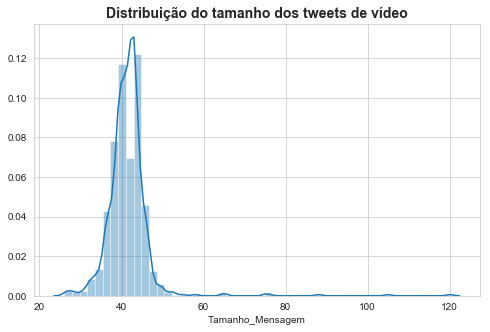

In [27]:
#Distplot do df video
fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(df_video['Tamanho_Mensagem'])
plt.title('Distribuição do tamanho dos tweets de vídeo', fontsize=14, fontweight='bold')
plt.show()

#https://stackoverflow.com/questions/53334421/futurewarning-with-distplot-in-seaborn

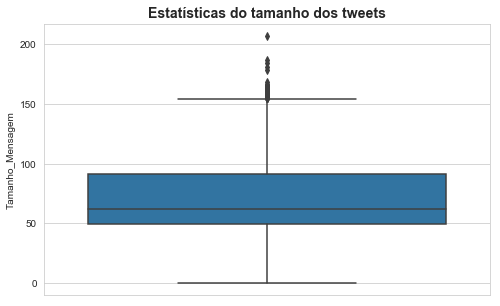

In [28]:
#Boxplot do df total
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=df['Tamanho_Mensagem'])
plt.title('Estatísticas do tamanho dos tweets', fontsize=14, fontweight='bold')
plt.show()

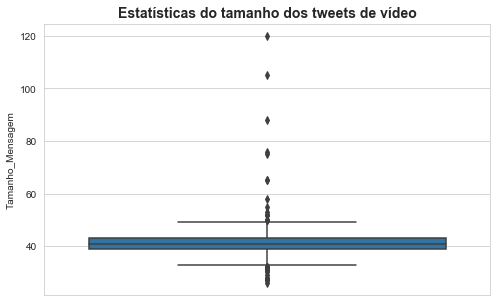

In [29]:
#Boxplot do df video
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=df_video['Tamanho_Mensagem'])
plt.title('Estatísticas do tamanho dos tweets de vídeo', fontsize=14, fontweight='bold')
plt.show()

In [30]:
df['Tamanho_Mensagem'].describe()

count    63326.000000
mean        70.645896
std         29.590005
min          0.000000
25%         49.000000
50%         62.000000
75%         91.000000
max        207.000000
Name: Tamanho_Mensagem, dtype: float64

In [31]:
df_video['Tamanho_Mensagem'].describe()

count    816.000000
mean      41.504902
std        5.698346
min       26.000000
25%       39.000000
50%       41.000000
75%       43.000000
max      120.000000
Name: Tamanho_Mensagem, dtype: float64

In [32]:
df[df['Tamanho_Mensagem']==0]

,Data,Dia_Semana,Ano,Mensagem_Final,http,Tamanho_Mensagem,Tamanho_http,Video
17581,2014-11-13,Thu,2014,,http://gu.com/p/438n2/tw\n,0,25,False


In [33]:
df[df['Tamanho_Mensagem']==207]

,Data,Dia_Semana,Ano,Mensagem_Final,http,Tamanho_Mensagem,Tamanho_http,Video
39927,2013-07-17,Wed,2013,RT @ronicaryn: The cost of insurance in New Yo...,,207,0,False


In [34]:
df_video[df_video['Tamanho_Mensagem']==26]

,Data,Dia_Semana,Ano,Mensagem_Final,http,Tamanho_Mensagem,Tamanho_http,Video
136,2015-03-14,Sat,2015,VIDEO: The art of microbes,http://bbc.in/1BD9KTr\n,26,22,True


In [35]:
df_video[df_video['Tamanho_Mensagem']==120]

,Data,Dia_Semana,Ano,Mensagem_Final,http,Tamanho_Mensagem,Tamanho_http,Video
13440,2013-01-30,Wed,2013,VIDEO: BRAND NEW! @JillianMichaels answers a 1...,http://bit.ly/I20lay,120,20,True


In [36]:
print('Tamanho min df: {}'.format(df.iloc[17581]['Mensagem_Final']))
print('Tamanho max df: {}'.format(df.iloc[39927]['Mensagem_Final']))
print('Tamanho min df_video: {}'.format(df.iloc[136]['Mensagem_Final']))
print('Tamanho max df_video: {}'.format(df.iloc[13440]['Mensagem_Final']))

Tamanho min df: 
Tamanho max df: RT @paula_span: Is 90 really the new 80? Danish study shows very old doing better, mentally and functionally, but how much better?
Tamanho min df_video: VIDEO: The art of microbes
Tamanho max df_video: VIDEO: BRAND NEW! @JillianMichaels answers a 13 year-old's questions about body image, watch now: #DDJillian #EHYOUTUBE



In [37]:
mensagens[17581]

['532856398615674880',
 'Thu Nov 13 11:24:00 +0000 2014',
 'http://gu.com/p/438n2/tw\n']

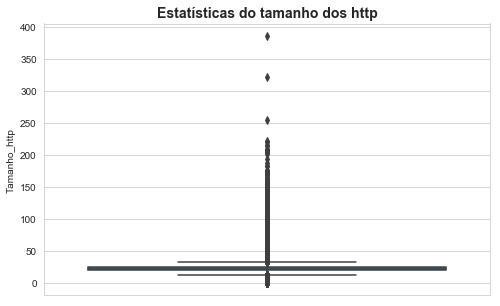

In [38]:
#Boxplot do df total-http
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=df['Tamanho_http'])
plt.title('Estatísticas do tamanho dos http', fontsize=14, fontweight='bold')
plt.show()

In [39]:
df['Tamanho_http'].describe()


count    63326.000000
mean        26.426334
std         21.821225
min          0.000000
25%         20.000000
50%         22.000000
75%         25.000000
max        386.000000
Name: Tamanho_http, dtype: float64

In [40]:
df[df['Tamanho_http']>25] # total de 11995 http

,Data,Dia_Semana,Ano,Mensagem_Final,http,Tamanho_Mensagem,Tamanho_http,Video
3929,2015-04-09,Thu,2015,Drugs need careful monitoring for expiry dates...,http://www.cbc.ca/news/health/drugs-need-caref...,63,111,False
3930,2015-04-09,Thu,2015,Sabra hummus recalled in U.S.,http://www.cbc.ca/news/health/sabra-hummus-rec...,29,77,False
3931,2015-04-09,Thu,2015,U.S. sperm bank sued by Canadian couple didn't...,http://www.cbc.ca/news/canada/toronto/sperm-ba...,80,125,False
3932,2015-04-09,Thu,2015,Manitoba pharmacists want clampdown on Tylenol...,http://www.cbc.ca/news/canada/manitoba/manitob...,54,112,False
3933,2015-04-09,Thu,2015,Mom of 7 'spooked' by vaccinations reverses st...,http://www.cbc.ca/news/canada/ottawa/tara-hill...,74,131,False
3934,2015-04-09,Thu,2015,Hamilton police send mental health pros to the...,http://www.cbc.ca/news/canada/hamilton/news/ha...,68,131,False
3935,2015-04-09,Thu,2015,Wind turbine noise linked to only 1 health iss...,http://www.cbc.ca/news/technology/wind-turbine...,60,111,False
3936,2015-04-09,Thu,2015,'Wild West' of e-cigarettes sparks debate over...,http://www.cbc.ca/news/business/new-e-cigarett...,57,105,False
3937,2015-04-09,Thu,2015,Dementia patients sold unproven 'brainwave opt...,http://www.cbc.ca/news/health/dementia-patient...,56,103,False
3938,2015-04-08,Wed,2015,Passengers on second China-Vancouver flight in...,http://www.cbc.ca/news/canada/british-columbia...,73,129,False


In [41]:
df.iloc[3929]['http'] #remete a uma página de notícia específica (não é a data corrente,como os comuns=>possível aprofundamento)

'http://www.cbc.ca/news/health/drugs-need-careful-monitoring-for-expiry-dates-pharmacists-say-1.3026749?cmp=rss\n'

In [42]:
df.iloc[3958]['http'] #também remete a página específica

'http://www.cbc.ca/news/world/ghana-how-canada-is-scaling-up-pediatric-nursing-to-save-little-lives-1.3020564?cmp=rss\n'

In [43]:
df[df['Tamanho_http']==386]

,Data,Dia_Semana,Ano,Mensagem_Final,http,Tamanho_Mensagem,Tamanho_http,Video
49766,2014-10-10,Fri,2014,RT @charlesornstein: .@SecBurwell acknowledged...,http://capsules.kaiserhealthnews.org/index.php...,110,386,False


In [44]:
df.iloc[49766]['http'] #referência a mais de um http

'http://healthcare.gov http://khne.ws/1slBCIs\n'

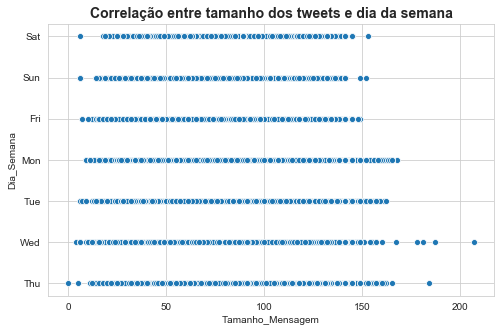

In [45]:
#Scatterplot tamanho x dia semana df total
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(df['Tamanho_Mensagem'], df['Dia_Semana'])
plt.title('Correlação entre tamanho dos tweets e dia da semana', fontsize=14, fontweight='bold')
plt.show()

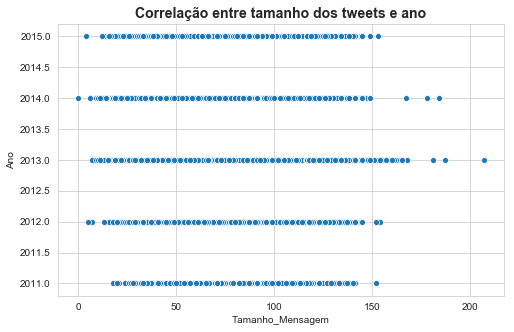

In [46]:
#Scatterplot tamanho x ano df total
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(df['Tamanho_Mensagem'], df['Ano'])
plt.title('Correlação entre tamanho dos tweets e ano', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
#PRÉ-PROCESSAMENTO DOS DADOS

In [47]:
# Importantdo bibliotecas
import nltk
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Derlon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
# Definindo função para limpeza e processamento do texto
def processa_texto(msg):
    #excluindo palavras com @
    sem_arr = [palavra for palavra in msg.split() if palavra[0] != '@']
    sem_arr = ' '.join(sem_arr)
    
    #retirando as pontuações e transformando caracteres em minúsculo (lower)
    sem_pontuacao = ' '.join([caracter.lower() for caracter in sem_arr.split()
                     if caracter not in string.punctuation])
           
    #removendo as stopwords
    msg_sem_stopword = [palavra for palavra in sem_pontuacao.split()
                        if palavra.lower() not in stopwords.words('english')]
 
    #reduzindo palavras ao seu radical (stemming)
    ps = PorterStemmer() #criando objeto para Stemming
    msg_stem = [ps.stem(palavra) for palavra in msg_sem_stopword]
    
    #excluindo caracteres diferentes de letras e palavras com 2 ou menos letras 
    msg_processada = re.sub(r'[^a-zA-Z]', ' ', ' '.join(msg_stem))
    msg_processada = msg_processada.split()
    for palavra in msg_processada:
        if len(palavra) <= 2 or len(palavra) >= 15:
            msg_processada.remove(palavra)
    
    return msg_processada

In [49]:
# Criando um modelo Bag of Words (bow) Total
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=processa_texto, min_df=2, max_df=.85, max_features=10000)
bow_vector = vectorizer.fit_transform(df['Mensagem_Final']) # cria vocabulário e retorna matriz termo-doc
feature_names=vectorizer.get_feature_names()

# Ponderando e normalizando os dados com TF-IDF usando TfidfTransformer do Scikit-learn
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(bow_vector) # transforma contagem da matriz esparsa em idf

# Transformando todo o bag of words em corpus TF-IDF
tfidf_vector = tfidf_transformer.transform(bow_vector)

print(feature_names)
print(list(vectorizer.vocabulary_.keys())[:10])


['a', 'aah', 'aand', 'aandecrisi', 'aap', 'ab', 'abandon', 'abbey', 'abbotsford', 'abbott', 'abbv', 'abbvi', 'abbvie', 'abc', 'abdomen', 'abdomin', 'abduct', 'abil', 'abilities', 'ability', 'abl', 'abnorm', 'aboard', 'aborigin', 'abort', 'abortion', 'abortions', 'abound', 'about', 'abrar', 'abroad', 'abs', 'abscess', 'absenc', 'absolut', 'absolutely', 'absorb', 'abstain', 'abstin', 'abstinence', 'abt', 'abund', 'abus', 'abuse', 'aca', 'academ', 'academia', 'acadia', 'acceler', 'accent', 'accentur', 'accept', 'access', 'accessori', 'accid', 'accident', 'accidents', 'accommod', 'accomplish', 'accord', 'account', 'accounts', 'accur', 'accuraci', 'accurate', 'accus', 'ace', 'acetaminophen', 'ach', 'ache', 'achi', 'achiev', 'achievements', 'achoo', 'acid', 'ackman', 'acknowledg', 'acl', 'aclu', 'acn', 'acne', 'aco', 'acos', 'acquir', 'acquisit', 'acronym', 'across', 'act', 'actavi', 'actavis', 'acthar', 'action', 'activ', 'active', 'activism', 'activist', 'activity', 'acto', 'actor', 'actre

In [50]:
print(type(tfidf_vector))
print(tfidf_vector.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(63326, 10000)


In [51]:
tfidf_vector

<63326x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 444373 stored elements in Compressed Sparse Row format>

In [52]:
vocab = list(vectorizer.vocabulary_.items())
vocab

[('breast', 971),
 ('cancer', 1180),
 ('risk', 7314),
 ('test', 8804),
 ('workload', 9848),
 ('harm', 3868),
 ('care', 1222),
 ('bma', 867),
 ('poll', 6490),
 ('short', 7797),
 ('people', 6281),
 ('heart', 3926),
 ('greater', 3739),
 ('new', 5768),
 ('approach', 423),
 ('hiv', 4016),
 ('promising', 6714),
 ('coalit', 1621),
 ('undermin', 9264),
 ('nhs', 5790),
 ('doctor', 2471),
 ('review', 7266),
 ('case', 1255),
 ('manag', 5151),
 ('video', 9515),
 ('all', 237),
 ('day', 2159),
 ('empty', 2779),
 ('do', 2466),
 ('overhaul', 6084),
 ('needed', 5733),
 ('end', 2784),
 ('lif', 4911),
 ('die', 2350),
 ('need', 5732),
 ('labour', 4735),
 ('tori', 8992),
 ('key', 4657),
 ('polici', 6481),
 ('servic', 7693),
 ('got', 3692),
 ('worse', 9869),
 ('amp', 309),
 ('wait', 9599),
 ('hit', 4014),
 ('worst', 9872),
 ('level', 4892),
 ('parti', 6188),
 ('row', 7387),
 ('open', 5986),
 ('hour', 4081),
 ('strenuou', 8387),
 ('run', 7406),
 ('may', 5248),
 ('bad', 611),
 ('health', 3905),
 ('non', 5830)

In [53]:
print(type(bow_vector))

<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
# NUVENS DE PALAVRAS

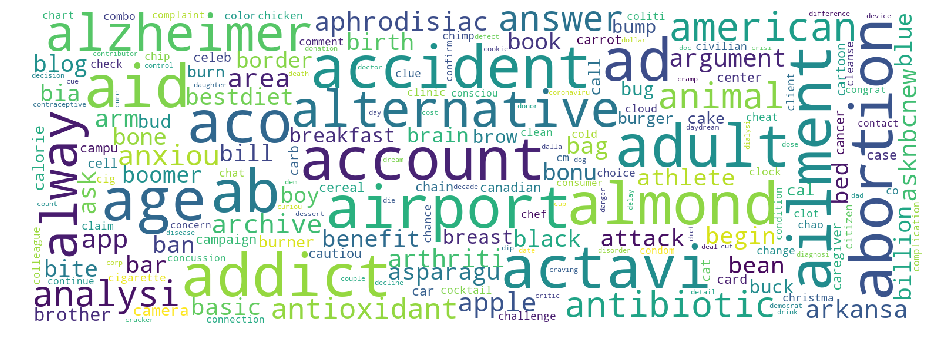

In [54]:
# Nuvem de palavras com feature_names do df total
from wordcloud import WordCloud

text = ' '.join(feature_names)
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535, colormap='viridis', background_color='white').generate(text)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [55]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
## https://www.translatetheweb.com/?from=en&to=pt&ref=SERP&dl=en&rr=UC&a=https%3a%2f%2fscikit-learn.org%2fstable%2fmodules%2ffeature_extraction.html

corpus_video=df_video['Mensagem_Final']

# Criando um modelo Bag of Words (bow) VIDEO
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_video = CountVectorizer(analyzer=processa_texto, min_df=2, max_df=.85, max_features=None)
bow_vector_video = vectorizer_video.fit_transform(corpus_video) # cria vocabulário e retorna matriz termo-doc
feature_names_video=vectorizer_video.get_feature_names()
print(feature_names_video)
print(list(vectorizer_video.vocabulary_.keys())[:10])
print(bow_vector_video.toarray())

# Ponderando e normalizando os dados com TF-IDF usando TfidfTransformer do Scikit-learn
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer_video = TfidfTransformer().fit(bow_vector_video) # transforma contagem da matriz esparsa em idf

# Transformando todo o bag of words em corpus TF-IDF
tfidf_vector_video = tfidf_transformer_video.transform(bow_vector_video)


['abort', 'abus', 'access', 'act', 'action', 'addict', 'adult', 'advic', 'affect', 'afford', 'africa', 'age', 'ahead', 'aid', 'aim', 'alcohol', 'allow', 'alzheimer', 'ambul', 'ambulance', 'amp', 'ampute', 'anim', 'anorexia', 'answer', 'antibiot', 'anxieti', 'appeal', 'appoint', 'area', 'art', 'ashya', 'asian', 'assist', 'asthma', 'attitud', 'attract', 'autism', 'awar', 'babi', 'back', 'ban', 'bank', 'banned', 'battl', 'beat', 'becom', 'behind', 'benefit', 'best', 'better', 'bid', 'big', 'biggest', 'bill', 'billion', 'bird', 'birth', 'blame', 'blind', 'blood', 'bma', 'bodi', 'body', 'bone', 'boom', 'boost', 'booz', 'boy', 'brain', 'brand', 'brazil', 'breakthrough', 'breast', 'bring', 'british', 'briton', 'burnham', 'call', 'calori', 'cameron', 'campaign', 'can', 'cancer', 'cannabi', 'car', 'care', 'carer', 'case', 'cash', 'catch', 'cell', 'centr', 'challeng', 'chang', 'changing', 'chariti', 'chief', 'child', 'children', 'cholera', 'cigarett', 'claim', 'clash', 'clegg', 'clinic', 'clock'

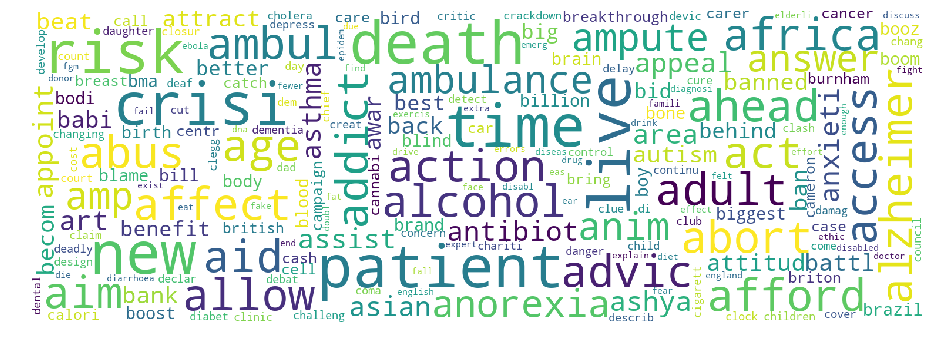

In [56]:
# Nuvem de palavras com feature_names do df VIDEO
from wordcloud import WordCloud

text_video = ' '.join(feature_names_video)
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535, colormap='viridis', background_color='white')
wordcloud.generate(text_video)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

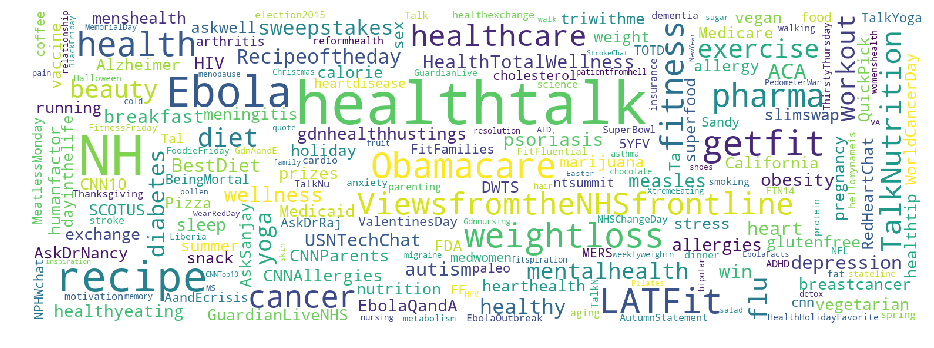

In [57]:
# Nuvem de palavras com hashtags
from wordcloud import WordCloud

text_hash = hashtags

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535, max_words=200, background_color='white', collocations=False)
wordcloud.generate(text_hash)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [58]:
hashtags

'#naturalhealth,#essentialoils,#HealthCanada,#drugsafety,#Physicians:,#chikungunya,#CCDR,#vaccine,#autism,#Ebola,#Ebola,#PeterPanLive,#,#mentalhealth,#cdnpoli,#vete…,#Ebola,#hospitalized,#poisoning,,#cutting).,#recall:,#health,#safe…,#Ebola,#Liberia,,#chil…,#WHO:,#Ebola,#Movember,#Movember,#prostatecancerawareness,#Canada,#Ebola,#cdnpoli,#CDNhealth:,#Ebola,#MSFstopEbola,#Ebola,#Ebola,#HIVR4P,#HIV,#Ebola,#Ebola,#NinaPham,#Ebola,#Ebola,#WHO,#Ebola-stricken,#tuberculosis,#EbolaFacts,#EbolaFacts,#EbolaFacts,#EbolaFacts,#EbolaFacts,#EbolaFacts,#EbolaFacts,#EbolaFacts,#EbolaFacts,#EbolaFacts,#EbolaFacts,#Ebola.,#EbolaFacts,#Ebola,#sl,#Ebola,#cbc,#enterovirus,#evd68,#EVD68,#infographic:,#ER?,#hospital,#cdnhealth,#Ebola,#cbc,#hw,#cdnpoli,#hw,#cdnpoli,#cbc,#Liberian,#ebola.,#Ebola.,#GeneticTesting,#health,#defibs.,#EbolaOutbreak,#ebola,#ebola,#cbc,#ebola,#cbc,#health,#defibs.,#ebola.,#ebola,#cbc,#Ebola,#cbc,#Ebola,#ebola,#monrovia.,#cbc…,#Ebola,#Ebola,#topoli,#urinaryincontinence,#kegel,#Ebola,

In [59]:
var = df['Mensagem_Final'].tolist()

for msg in var:
    for w in msg.split():
        if w == 'almond' or w == 'almonds':
            print(msg)
        
  

Cumin recalled for unreported traces of almonds
RT @kimbrunhuber: Study in CMAJ: Kids who only drink non-cow’s milk (like almond &amp; soy) have &gt; 2x chance of VitD deficiency as kids who onl…

Peanut and almond butters recalled over salmonella risk
Peanut &amp; almond butters sold @TraderJoesList @kroger @Safeway @WholeFoods recalled over salmonella fears
RT @namibycandy: Quinoa flour pancakes topped w/ almond butter &amp; strawberries! 😊 RT @cnnhealth What's in ur breakfast? Show us for RT!
RT @goodhealth: #BREAKFAST: Yummy banana and almond butter toast is just 280 calories!
RT @ENERGYbits: @EverydayHealth A5 I will never let myself run out of coconut oil or almond milk! #healthtalk

RT @IntegHealthRev: @EverydayHealth A3: We love almond milk, or any nut milk for that matter. #healthtalk

Almond milk, almond butter, chia seeds, and more trendy health foods with serious benefits:
RT @CynthiaSass: @goodhealth Q2 Add good-4-u fat to smoothies (avocado, almond butter, coconut oil)–it

In [60]:
#var = df['Mensagem_Final'].tolist()

for msg in var:
    for w in msg.split():
        if w[:7] == 'account':
            print(msg)

RT @NightShiftMD: Beth:  Beth's full &amp; astonishing account of why baby Michael died a preventable death.

Readers share 1st-person Yaz, Yasmin accounts
24 @twitter accounts to follow to understand #EbolaOutbreak. @drsanjaygupta is No. 3 via @voxdotcom

Hey there! @DrSanjayGupta here. I'm taking over this account until 3p ET to answer your questions about brain health. Let's chat! #AskSanjay

The importance of making 'deposits' into our health bank accounts from @AgapiSays:
RT @Sprouttk2001: #healthtalk:Q6 Thanks to my family holding me accountable I have been achieving my goals in 2013

RT @LHawke45: A co-worker and I txt each other every morning before we work out. A little accountability to get me going. #HealthTalk

RT @sarahstanley: Share your goals with others so you can be held accountable. #healthtalk

RT @theRCN: Did you know, nursing staff account for around 1,800 voters in each constituency? Pledge to vote on 7 May &gt;
Some people think all we do in NHS payroll is press 

In [ ]:
#PROCURANDO O K IDEAL PARA K-MEANS

1 62988.36000177703
2 62749.60671046242
3 62530.97999622401
4 62381.49855156796
5 62213.44836020433
6 62155.26241723824
7 61985.02187511899
8 61916.583189647055
9 61807.917730270936
10 61720.33600275774
11 61617.934154317845
12 61559.14992767555
13 61476.982551462876
14 61386.0349006294
15 61255.05003269241
16 61164.02105515739
17 61114.11408520545
18 61075.31952835138
19 61028.814647028405
20 60954.21057854815
21 60831.88456601549
22 60764.871179763526
23 60724.510726917084
24 60615.09221516957
25 60563.258251061314
26 60471.063168092536
27 60470.916188622316
28 60394.415562742346
29 60308.039362053554


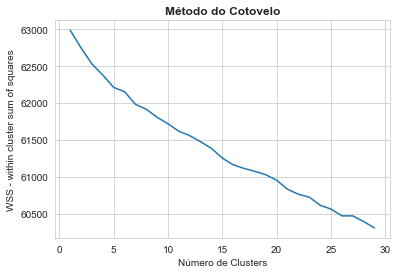

In [62]:
#https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/
#Método do Cotovelo

from sklearn.cluster import KMeans
wcss =[]
for i in range(1,30):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans = kmeans.fit(tfidf_vector)
    print (i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,30), wcss)
plt.title('Método do Cotovelo', fontweight= 'bold')
plt.xlabel('Número de Clusters')
plt.ylabel('WSS - within cluster sum of squares')
plt.show()

In [ ]:
#TREINAMENTO DE MODELOS

In [63]:
from sklearn.cluster import KMeans
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans = kmeans.fit(tfidf_vector)
centroides = kmeans.cluster_centers_
labels = kmeans.labels_
df["Cluster"] = kmeans.fit_predict(tfidf_vector)

In [64]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [65]:
centroides

array([[2.34154707e-03, 1.56516258e-04, 5.25885875e-05, ...,
        1.43123949e-05, 0.00000000e+00, 6.89697412e-06],
       [1.60246356e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.50831960e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.92981092e-03, 1.60462766e-03, 0.00000000e+00, ...,
        1.18235656e-04, 0.00000000e+00, 0.00000000e+00],
       [1.63256867e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.21882331e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [66]:
labels

array([5, 8, 5, ..., 7, 0, 0])

In [67]:
df_clusters = df["Cluster"].value_counts()
print(df_clusters)
print(type(df_clusters))

0    41015
3     3967
7     3912
9     2856
2     2517
4     2326
6     1860
5     1753
8     1651
1     1469
Name: Cluster, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
df.head()

In [ ]:
# APRESENTAÇÃO DE RESULTADOS

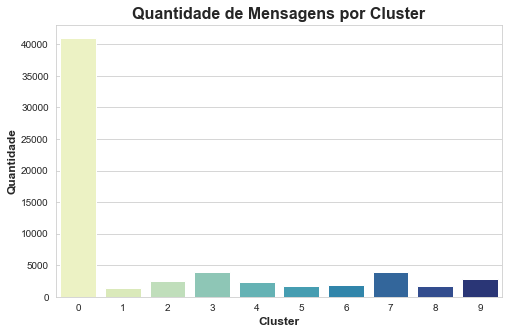

In [68]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(df['Cluster'], palette='YlGnBu')
plt.title('Quantidade de Mensagens por Cluster', fontsize=16, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()

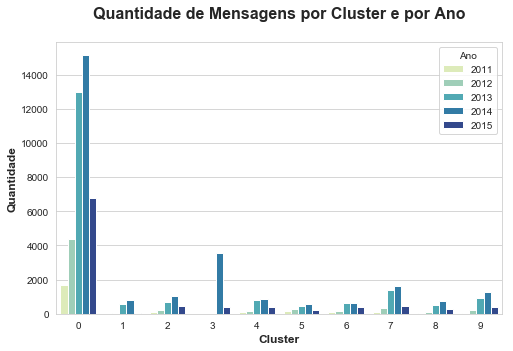

In [69]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(df['Cluster'], hue=df['Ano'], palette='YlGnBu')
plt.title('Quantidade de Mensagens por Cluster e por Ano\n', fontsize=16,fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()

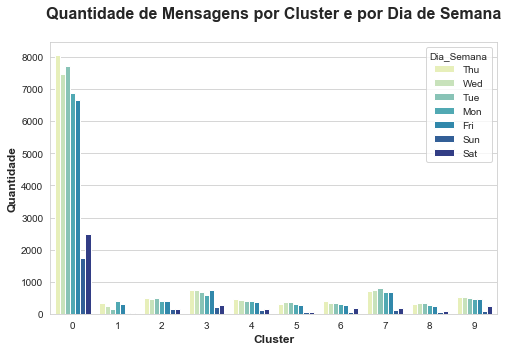

In [70]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(df['Cluster'], hue=df['Dia_Semana'], palette='YlGnBu')
plt.title('Quantidade de Mensagens por Cluster e por Dia de Semana\n', fontsize=16, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()

In [79]:
print('Termos mais frequentes por cluster:')

order_centroids = centroides.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(10):
    print('Cluster {}:'.format(i))
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Termos mais frequentes por cluster:
Cluster 0:
 may cancer say studi drug food make doctor eat amp
Cluster 1:
 well ask doctor cancer live exercis think may like new
Cluster 2:
 help video may weight could cancer lose food studi patient
Cluster 3:
 ebola liberia s africa outbreak patient sierra case say leon
Cluster 4:
 get way health help fit here new kid like free
Cluster 5:
 risk cancer may heart rais increas studi higher lower link
Cluster 6:
 like work look opinion sell still smoothli november kidney end
Cluster 7:
 health law insur mental exchang plan say state may today
Cluster 8:
 care health new afford act hospit patient social cost home
Cluster 9:
 new old blog age york studi drug year find pay


In [72]:
####https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py

#feature_names=vectorizer.get_feature_names()
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

bow_transformer = vectorizer.fit(df['Mensagem_Final'])

print('Tags mais frequentes por cluster:')
order_centroids = centroides.argsort()[:, ::-1]
lista_terms=[]

for i in range(0, 10):
    print('\n Cluster {}: '.format(i))
    for x in order_centroids[i, :10]:
        cluster = i
        term = feature_names[x]
        valor = tfidf_transformer.idf_[bow_transformer.vocabulary_[term]]
        print(term, ': ', valor)
        lista_terms.append([i, term, valor])
        
df_terms = pd.DataFrame(lista_terms, columns=[ 'Cluster','Termo', 'Tf-Idf'])

df_terms

Tags mais frequentes por cluster:

 Cluster 0: 
may :  4.0149760537655474
cancer :  4.287111012935848
say :  4.070582700740358
studi :  4.243688851485571
drug :  4.401623831004068
food :  4.659118454853166
make :  4.662803962710342
doctor :  4.656057540311488
eat :  4.999030075776289
amp :  4.645115181890544

 Cluster 1: 
well :  4.701704727052704
ask :  5.882280953572244
doctor :  4.656057540311488
cancer :  4.287111012935848
live :  5.332234616652972
exercis :  5.556280016818326
think :  5.629578600016489
may :  4.0149760537655474
like :  4.901451700560518
new :  3.8799567152368386

 Cluster 2: 
help :  4.370823449498347
video :  5.090042870368068
may :  4.0149760537655474
weight :  5.06673179149962
could :  4.9768826628645115
cancer :  4.287111012935848
lose :  5.631198033568793
food :  4.659118454853166
studi :  4.243688851485571
patient :  4.561636842442615

 Cluster 3: 
ebola :  3.6669345361254604
liberia :  6.15070520941961
s :  4.65422547873035
africa :  6.0253817972129164
outb

,Cluster,Termo,Tf-Idf
0,0,may,4.014976
1,0,cancer,4.287111
2,0,say,4.070583
3,0,studi,4.243689
4,0,drug,4.401624
5,0,food,4.659118
6,0,make,4.662804
7,0,doctor,4.656058
8,0,eat,4.999030
9,0,amp,4.645115


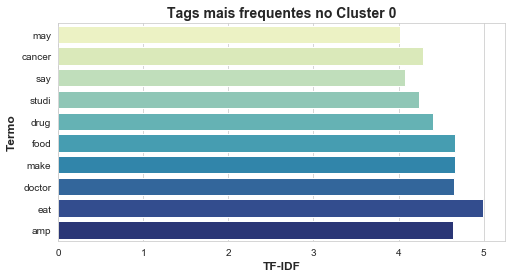

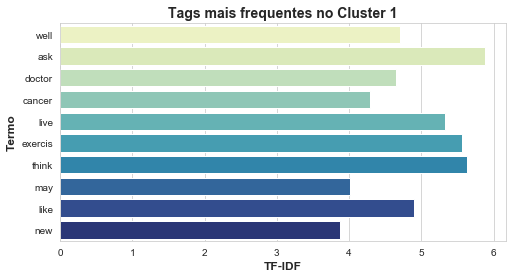

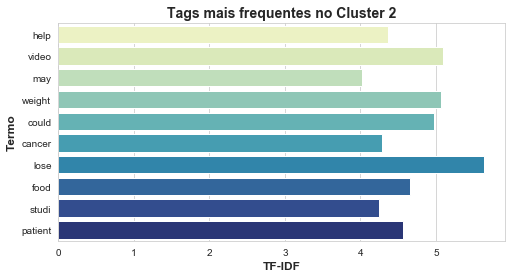

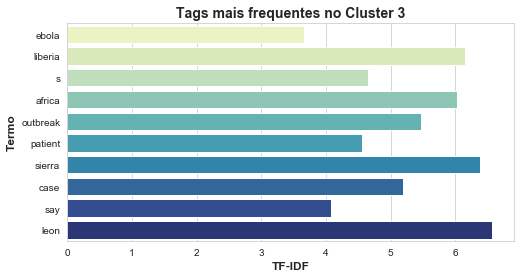

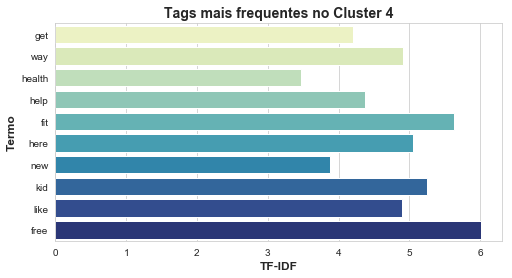

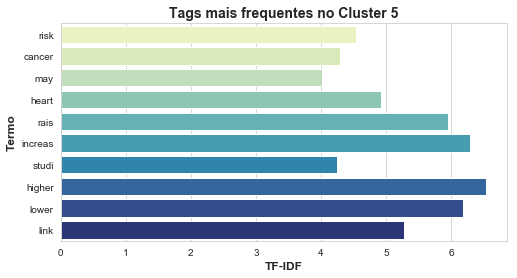

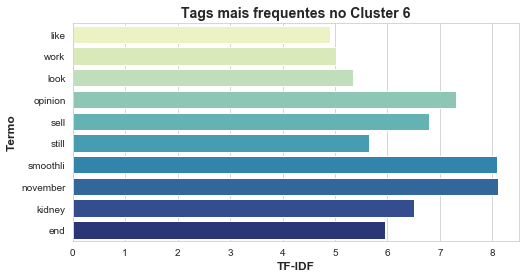

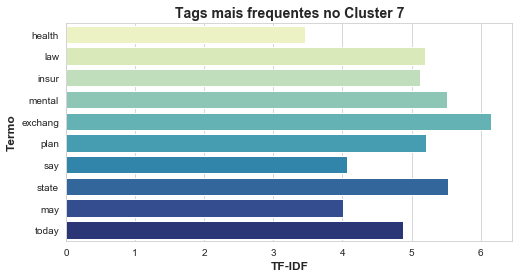

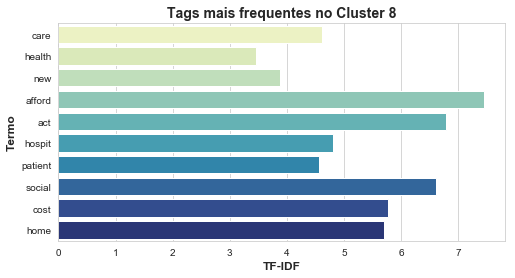

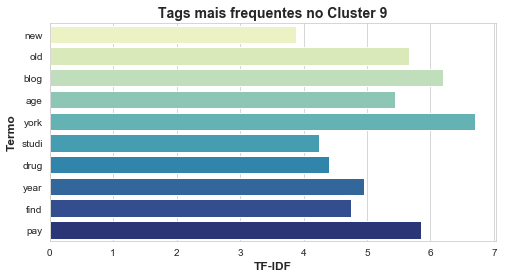

In [73]:
# Plotando gráficos de palavras mais frequentes por cluster (continuação)
for i in range(0,10):
    fig, ax = plt.subplots(figsize=(8,4))
    plt.title('Tags mais frequentes no Cluster {}'.format(i), fontsize=14, fontweight='bold')
    sns.barplot(data=df_terms[df_terms['Cluster']==i], x='Tf-Idf', y='Termo', orient='h', palette='YlGnBu')
    ax.set_xlabel('TF-IDF', fontsize=12, fontweight='bold')
    ax.set_ylabel('Termo', fontsize=12, fontweight='bold')
    plt.show()

In [82]:
df[df['Cluster']==0]['Mensagem_Final']

4                     Coalition 'undermined NHS' - doctors
5                       Review of case against NHS manager
10                             Have GP services got worse?
12                       Parties row over GP opening hours
13          Why strenuous runs may not be so bad after all
16                   80,000 'might die' in future outbreak
17                    Skin cancer 'linked to holiday boom'
18                     Public 'back tax rises to fund NHS'
21                         Five ideas to transform the NHS
22                     Personal cancer vaccines 'exciting'
23                     Child heart surgery deaths 'halved'
25                     Unsafe food 'growing global threat'
27                    Ambulance progress 'not fast enough'
28                    Children’s hospital builds sleep app
29                       Drug giant 'blocks' eye treatment
30                   Blood test for Down's syndrome hailed
32                     Paracetamol ‘no good for back pai